In [48]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

 ## compute the camera calibration using chessboard images

Text(0.5,1,'colored corners')

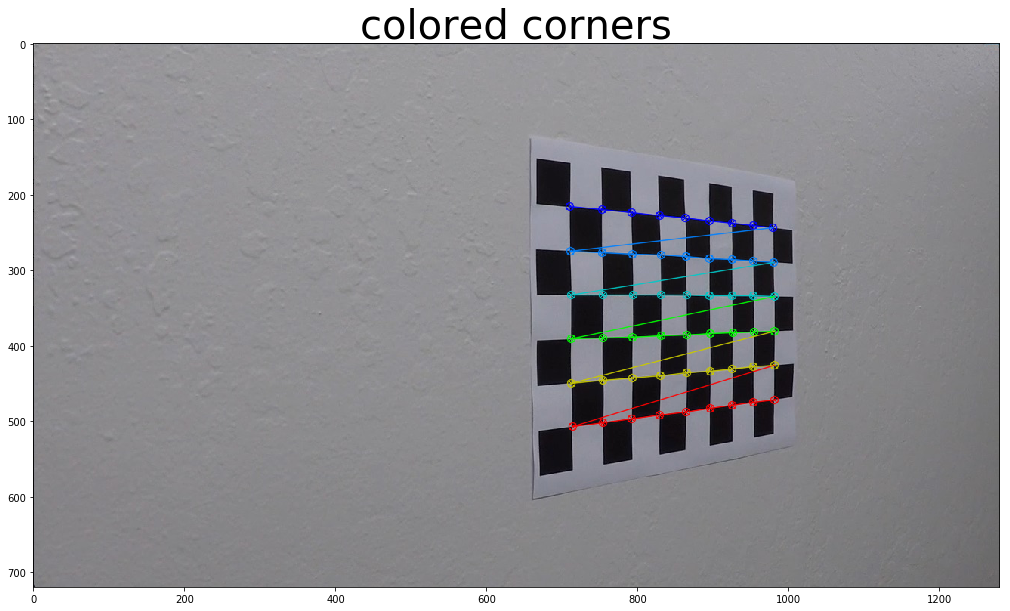

In [49]:
# Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
import glob

#read in and make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

#Arrays to store objects points and image points from all the images
objpoints = [] #3d points
imgpoints = [] #2d points

#prepare points
objp  = np.zeros((9*6,3),np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)


for fname in images:
    #read in each image
    img = mpimg.imread(fname)
    #convert image to gray scale  
    gray  = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    #find corners  
    ret,corners = cv2.findChessboardCorners(gray,(9,6),None)
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        draw = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        
# Visualize
f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.imshow(draw)
ax1.set_title('colored corners', fontsize=40)


In [50]:
#calibrate
img = mpimg.imread('./camera_cal/calibration4.jpg')
shape =(img.shape[1],img.shape[0])
ret, mtx, dist, rvect, tvect = cv2.calibrateCamera(objpoints,imgpoints,shape,None,None)

## Visualize the camera calibration

Text(0.5,1,'Undistorted Image')

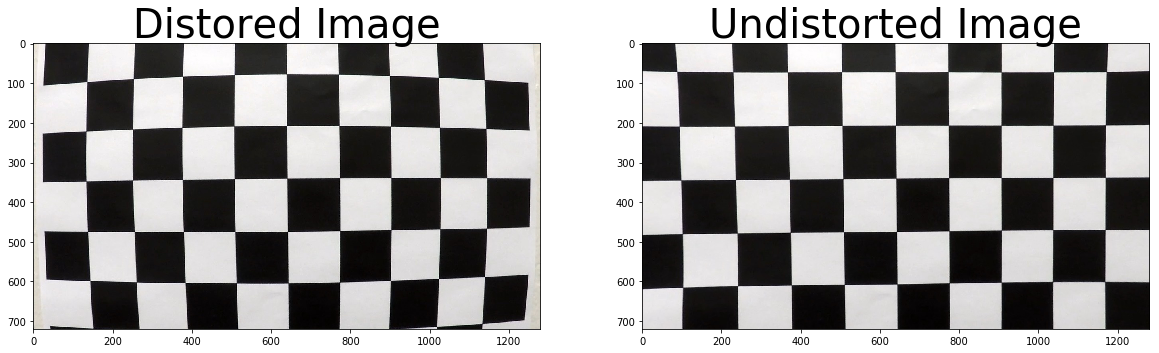

In [51]:
# load distored image
distored_image = mpimg.imread('./camera_cal/calibration1.jpg')
#undistored the image
undistorted_image = cv2.undistort(distored_image, mtx, dist, None, mtx)
# Visualize
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(distored_image)
ax1.set_title('Distored Image', fontsize=40)
ax2.imshow(undistorted_image)
ax2.set_title('Undistorted Image', fontsize=40)


## Load example image

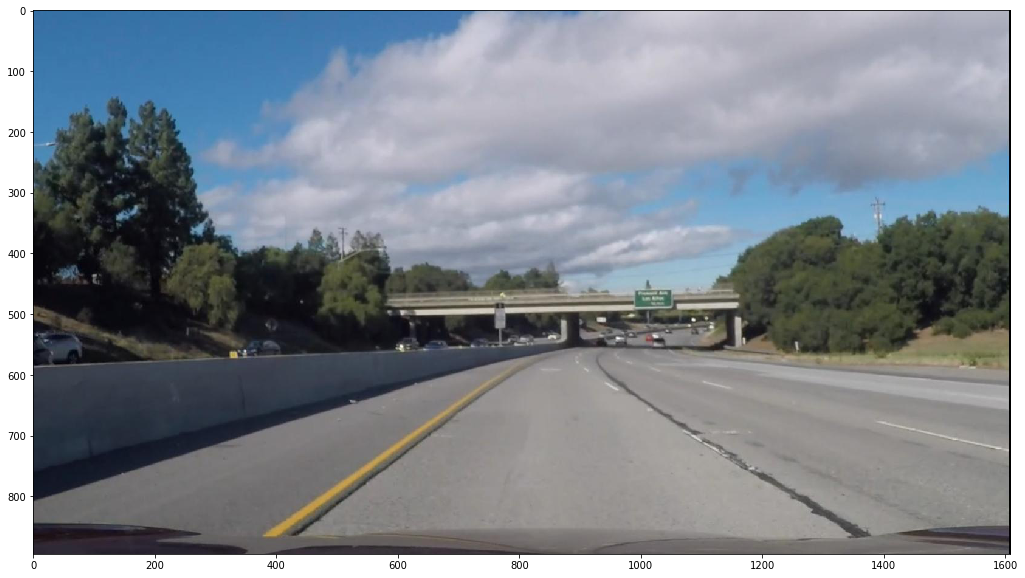

In [52]:
example_image = mpimg.imread('./challenge/ch1.jpg')
f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.imshow(example_image)

## Undistort example_image

Text(0.5,1,'Undistorted Image')

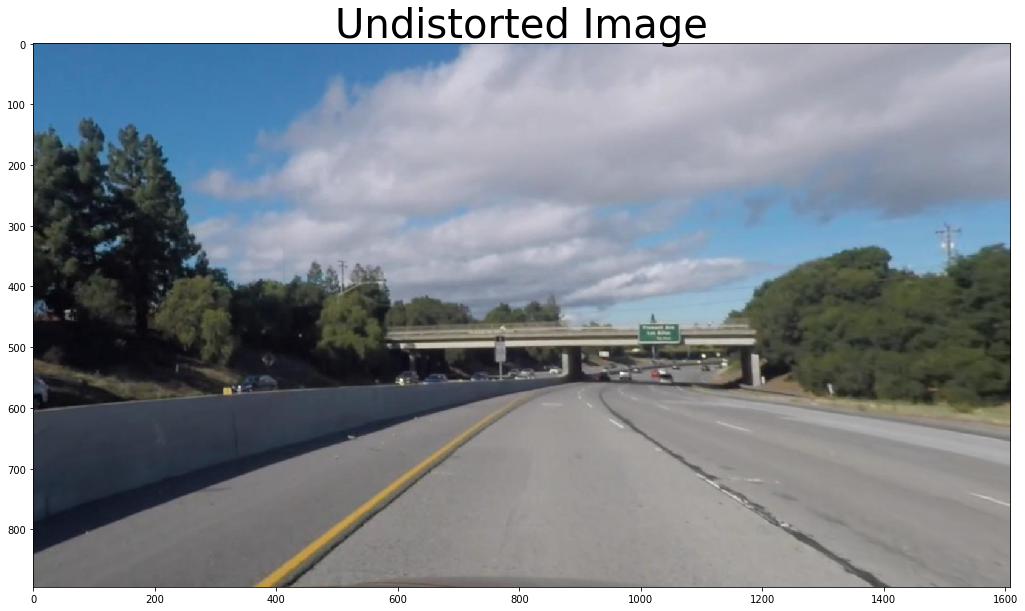

In [53]:
#undistored the image
undistorted_example_image = cv2.undistort(example_image, mtx, dist, None, mtx)
# Visualize
f, (ax1) = plt.subplots(1,1, figsize=(20,10))
ax1.imshow(undistorted_example_image)
ax1.set_title('Undistorted Image', fontsize=40)

## Define sobel threshhold functions

In [54]:
# X or Y sobel gradient
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    abs_sobel_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    abs_sobel_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1

    # Return the result
    return abs_sobel_output

# Magnitude using X and Y sobel gradient
def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
        # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    mag_binary = np.zeros_like(gradmag)
    mag_binary[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return mag_binary

# Direction using X and Y sobel gradient
def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
      # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    scale_factor = np.max(absgraddir)/255 
    absgraddir = (absgraddir/scale_factor).astype(np.uint8) 
    dir_binary =  np.zeros_like(absgraddir)
    dir_binary[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return dir_binary

## Visualize sobel threshholds results

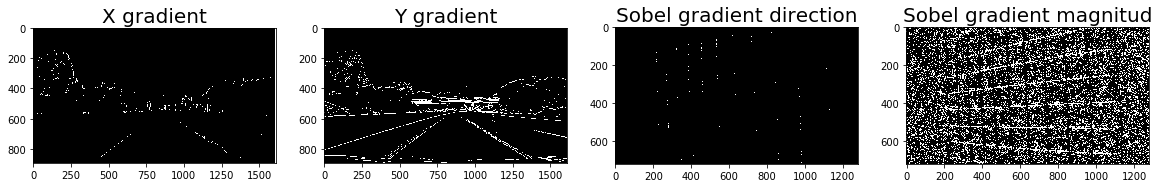

In [55]:
# X gradient
x_sobel = abs_sobel_thresh(example_image,thresh=(30, 255))
# Y gradient
y_sobel = abs_sobel_thresh(example_image,orient='y',thresh=(30, 255))
# Sobel gradient direction
dir_sobel = dir_threshold(example_image,thresh=(0.7,1.3))
# Sobel gradient magnitude
mag_sobel = dir_threshold(example_image,thresh=(200,255))

# visualize
f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('X gradient', fontsize=20)
ax1.imshow(x_sobel,cmap='gray')
ax2.set_title('Y gradient', fontsize=20)
ax2.imshow(y_sobel,cmap='gray')
ax3.set_title('Sobel gradient direction', fontsize=20)
ax3.imshow(dir_sobel,cmap='gray')
ax4.set_title('Sobel gradient magnitud', fontsize=20)
ax4.imshow(mag_sobel,cmap='gray')

## HLS Model

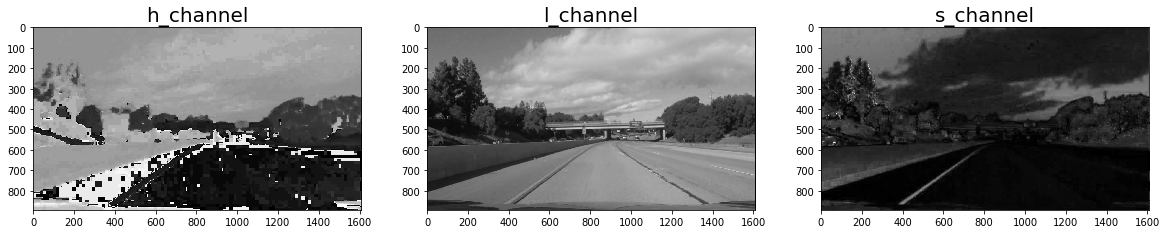

In [56]:
#convert to hls
hls = cv2.cvtColor(example_image,cv2.COLOR_RGB2HLS)
h_channel = hls[:,:,0]
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]

# visualize
f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('h_channel', fontsize=20)
ax1.imshow(h_channel,cmap='gray')
ax2.set_title('l_channel', fontsize=20)
ax2.imshow(l_channel,cmap='gray')
ax3.set_title('s_channel', fontsize=20)
ax3.imshow(s_channel,cmap='gray')


## LAB Model

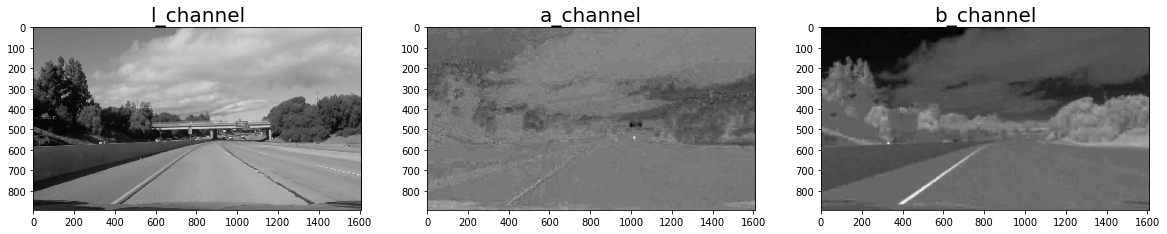

In [57]:
#convert to lab
lab = cv2.cvtColor(example_image,cv2.COLOR_RGB2LAB)
l_channel = lab[:,:,0]
a_channel = lab[:,:,1]
b_channel = lab[:,:,2]

# visualize
f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('l_channel', fontsize=20)
ax1.imshow(l_channel,cmap='gray')
ax2.set_title('a_channel', fontsize=20)
ax2.imshow(a_channel,cmap='gray')
ax3.set_title('b_channel', fontsize=20)
ax3.imshow(b_channel,cmap='gray')

In [58]:
# color threshhold using l channel
def l_color_grad(img, l_thresh = (180,200)):
    # convert to hls
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    #extract the s channel
    l_channel = hls[:,:,1]
    l_channel = l_channel*(255/np.max(l_channel)).astype(np.uint8)   
    #masking
    binary = np.zeros_like(l_channel)
    binary[(l_channel > l_thresh[0]) & (l_channel <= l_thresh[1])] = 1
    return binary

In [81]:
# color threshhold using b channel
def b_color_grad(img, b_thresh = (160,255)):
    # convert to hls
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    #extract the s channel
    b_channel = lab[:,:,2]
    
    if np.max(b_channel) > 175: 
        b_channel = b_channel*(255/np.max(b_channel)).astype(np.uint8)
    #masking
    binary = np.zeros_like(b_channel)
    binary[(b_channel > b_thresh[0]) & (b_channel <= b_thresh[1])] = 1
    return binary

## Combined image

In [84]:
def select_yellow(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    lower = np.array([20,60,60])
    upper = np.array([38,174, 250])
    mask = cv2.inRange(hsv, lower, upper)

    return mask

def select_white(image):
    lower = np.array([202,202,202])
    upper = np.array([255,255,255])
    mask = cv2.inRange(image, lower, upper)

    return mask

def comb_thresh(image):
    yellow = select_yellow(image)
    white = select_white(image)

    combined_binary = np.zeros_like(yellow)
    combined_binary[(yellow >= 1) | (white >= 1)] = 1

    return combined_binary

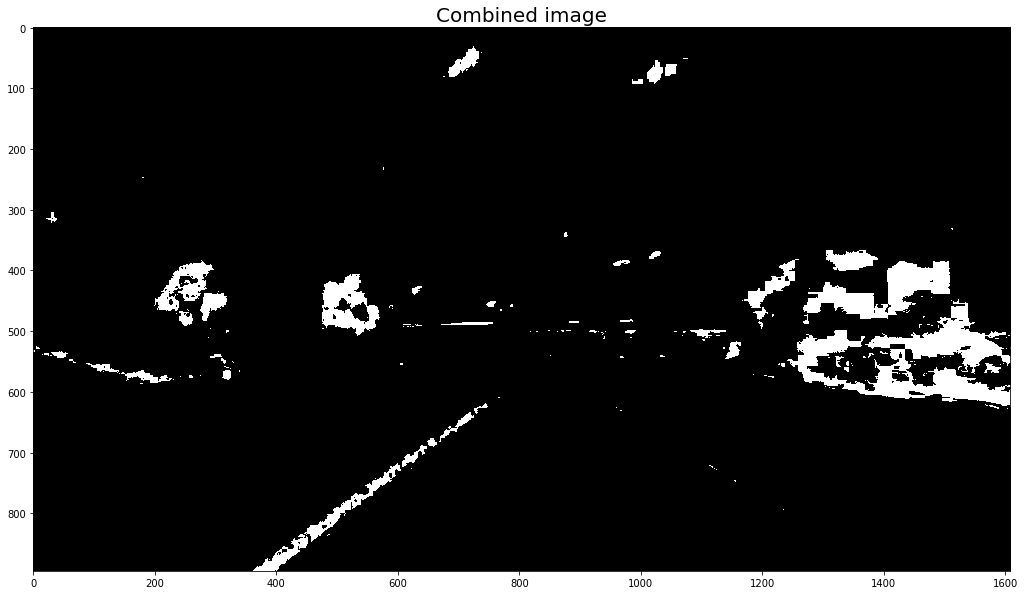

In [92]:
# generate a binary warped image
# gradx      = abs_sobel_thresh(undistorted_example_image, orient='x', sobel_kernel=3, thresh=(9, 10))
# l_channel  = l_color_grad(undistorted_example_image) 
# b_channel  = b_color_grad(undistorted_example_image)
combined   = comb_thresh(undistorted_example_image)
#combined[((l_channel == 1) ) |  ((b_channel==1) | (gradx==1))] =1

f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.set_title('Combined image', fontsize=20)
ax1.imshow(combined,cmap='gray')

## Src Points

[[    0.   895.]
 [ 1638.   895.]
 [  644.   597.]
 [  964.   597.]]


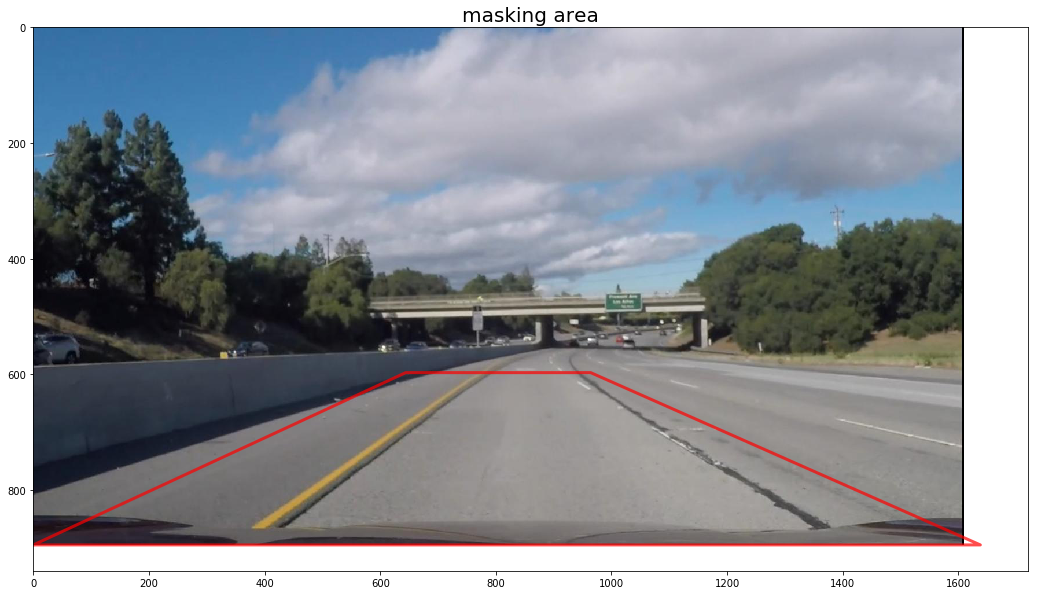

In [61]:
# creating the masking region for perspective
midpoint = example_image.shape[1]//2 
farOffset = example_image.shape[1]//10
nearOffset = example_image.shape[1]//2
length = example_image.shape[0]//3
bottom_margin = 0
# source points
src = np.float32([[midpoint-nearOffset, example_image.shape[0]-bottom_margin], [midpoint+nearOffset+30, example_image.shape[0]-bottom_margin],
                 [midpoint-farOffset, example_image.shape[0]-length], [midpoint+farOffset, example_image.shape[0]-length]])

print (src)

# visualize
f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.set_title('masking area', fontsize=20)
ax1.imshow(example_image)
ordered_y = [src[0][1],src[2][1],src[3][1],src[1][1],src[0][1]]
ordered_x = [src[0][0],src[2][0],src[3][0],src[1][0],src[0][0]]
ax1.plot(ordered_x,ordered_y , color='red', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)

## Dst points

[[   25.   870.]
 [ 1584.   870.]
 [   25.    25.]
 [ 1584.    25.]]


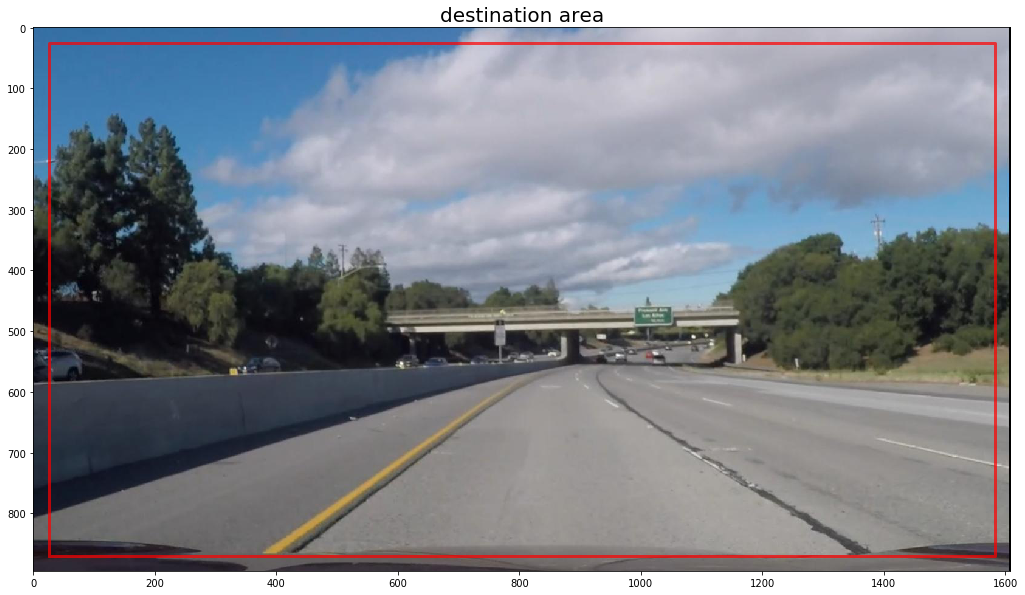

In [62]:
# creating the masking region for perspective
midpoint = example_image.shape[1]//2 
farOffset = example_image.shape[1]//10
nearOffset = example_image.shape[1]//2
length = example_image.shape[0]//3
bottom_margin = 0
# source points
dst = np.float32([[25, example_image.shape[0]-25], [example_image.shape[1]-25, example_image.shape[0]-25],
                     [25,25], [example_image.shape[1]-25, 25]])
print(dst)
# visualize
f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.set_title('destination area', fontsize=20)
ax1.imshow(example_image)
ordered_y = [dst[0][1],dst[2][1],dst[3][1],dst[1][1],dst[0][1]]
ordered_x = [dst[0][0],dst[2][0],dst[3][0],dst[1][0],dst[0][0]]
ax1.plot(ordered_x,ordered_y , color='red', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)

## Perspective Transformation

In [63]:
def perspective_transform(undistorted,inverse):   
    # creating the masking region for perspective
    midpoint = undistorted.shape[1]//2 
    farOffset = undistorted.shape[1]//10
    nearOffset = undistorted.shape[1]//2
    length = undistorted.shape[0]//3
    bottom_margin = 0
   
    # source points
    src = np.float32([[midpoint-nearOffset, undistorted.shape[0]-bottom_margin], [midpoint+nearOffset+30, undistorted.shape[0]-bottom_margin],
                     [midpoint-farOffset, undistorted.shape[0]-length], [midpoint+farOffset, undistorted.shape[0]-length]])

    # destination points
    dst = np.float32([[25, undistorted.shape[0]-25], [undistorted.shape[1]-25, undistorted.shape[0]-25],
                     [25,25], [undistorted.shape[1]-25, 25]])
    img_size = (undistorted.shape[1], undistorted.shape[0])
    if (inverse == 0):
      M = cv2.getPerspectiveTransform(src, dst)
    else:
      M = cv2.getPerspectiveTransform(dst,src)  
    warped = cv2.warpPerspective(undistorted, M, img_size, flags=cv2.INTER_LINEAR)

    return warped



## Perspective Transformation result

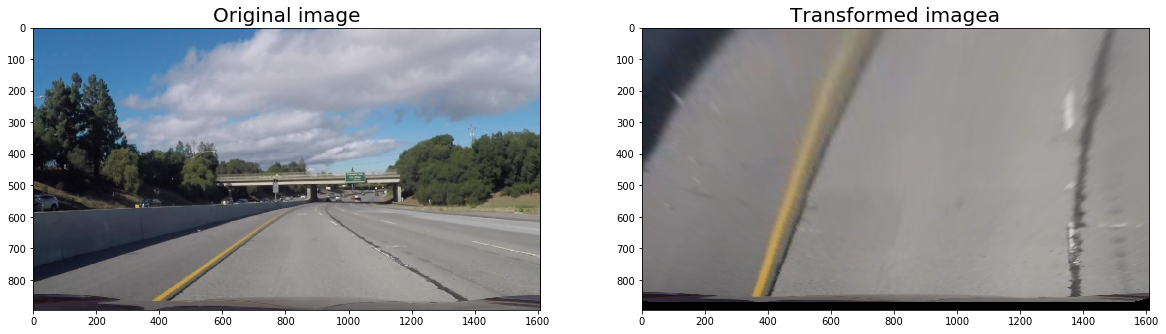

In [64]:
# unwarped image
transformed_img = perspective_transform(example_image,0)

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Original image', fontsize=20)
ax1.imshow(example_image)
ax2.set_title('Transformed imagea', fontsize=20)
ax2.imshow(transformed_img)


## Line class to keep track of history

In [65]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients for the most recent fit
        self.current_fit = []  
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        
    # update the founf fits    
    def add_fit(self, fit, inds):
        if fit is not None:
            # best fit exist
            if self.best_fit is not None:
                self.diffs = abs(fit-self.best_fit)
            if (self.diffs[0] > 0.001 or self.diffs[1] > 1.0 or self.diffs[2] > 100.) and len(self.current_fit) > 0:
                self.detected = False
            else:
                self.detected = True
                self.px_count = len(inds)
                self.current_fit.append(fit)
                if len(self.current_fit) > 5:
                    # throw out old fits, keep newest n
                    self.current_fit = self.current_fit[len(self.current_fit)-5:]
                self.best_fit = np.average(self.current_fit, axis=0)
        # or remove one from the history, if not found
        else:
            self.detected = False
            if len(self.current_fit) > 0:
                self.current_fit = self.current_fit[1:]
            if len(self.current_fit) > 0:
                self.best_fit = np.average(self.current_fit, axis=0)

## Find lane_line Pixels

In [66]:
def histo_finding_lane(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 10
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 80
    # Set minimum number of pixels found to recenter window
    minpix = 40
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        (0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        (0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
    return left_fit,right_fit,left_lane_inds,right_lane_inds,out_img,histogram,leftx,lefty,rightx,righty


## Visualize the histo finding technique

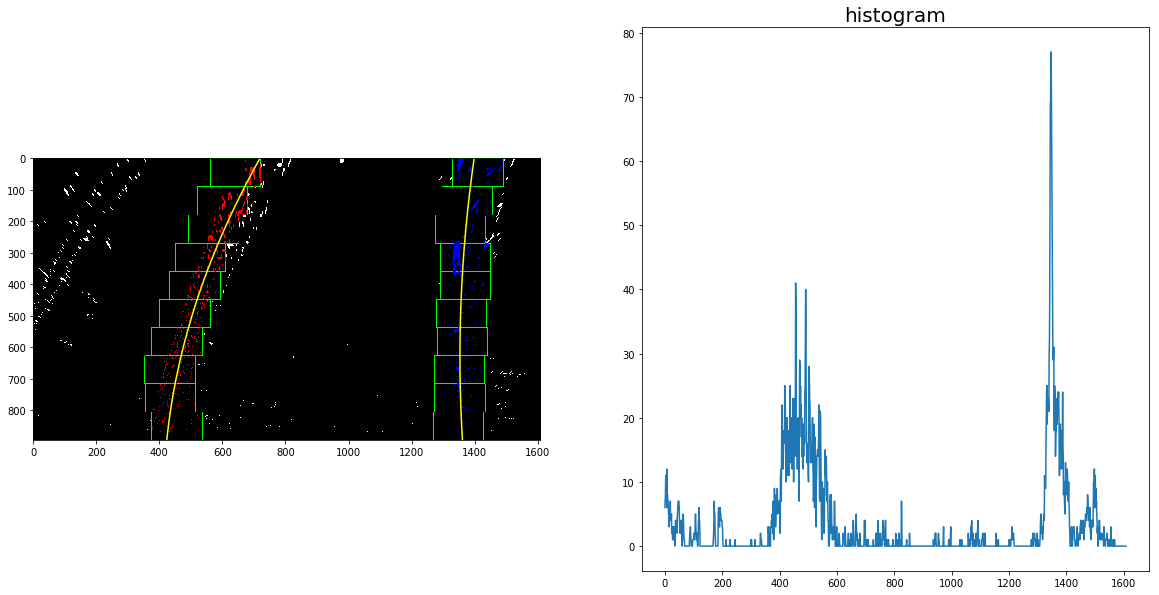

In [67]:
# generate a binary warped image
gradx      = abs_sobel_thresh(undistorted_example_image, orient='x', sobel_kernel=3, thresh=(9, 10))
l_channel  = l_color_grad(undistorted_example_image) 
b_channel  = b_color_grad(undistorted_example_image)
combined   = np.zeros_like(gradx)
combined[((l_channel == 1) ) |  ((b_channel==1) | (gradx==1))] =1
warped = perspective_transform(combined,0)

#generate the needed values for plotting
left_fit, right_fit, left_lane_inds, right_lane_inds,out_img,histogram,_,_,_,_ = histo_finding_lane(warped)

# Generate x and y values for plotting
ploty = np.linspace(0, warped.shape[0]-1, warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]


f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(out_img)
ax1.plot(left_fitx, ploty, color='yellow')
ax1.plot(right_fitx, ploty, color='yellow')

ax2.set_title('histogram', fontsize=20)
ax2.plot(histogram)


In [68]:
def margin_finding_lane(left_fit,right_fit,binary_warped):
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 80
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
    left_fit[1]*nonzeroy + left_fit[2] + margin))) 

    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
    right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                                  ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                                  ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)

    return left_fit,right_fit,left_lane_inds,right_lane_inds,result,leftx,lefty,rightx,righty
   



## Visualize lane finding using older left_fit and right_fit

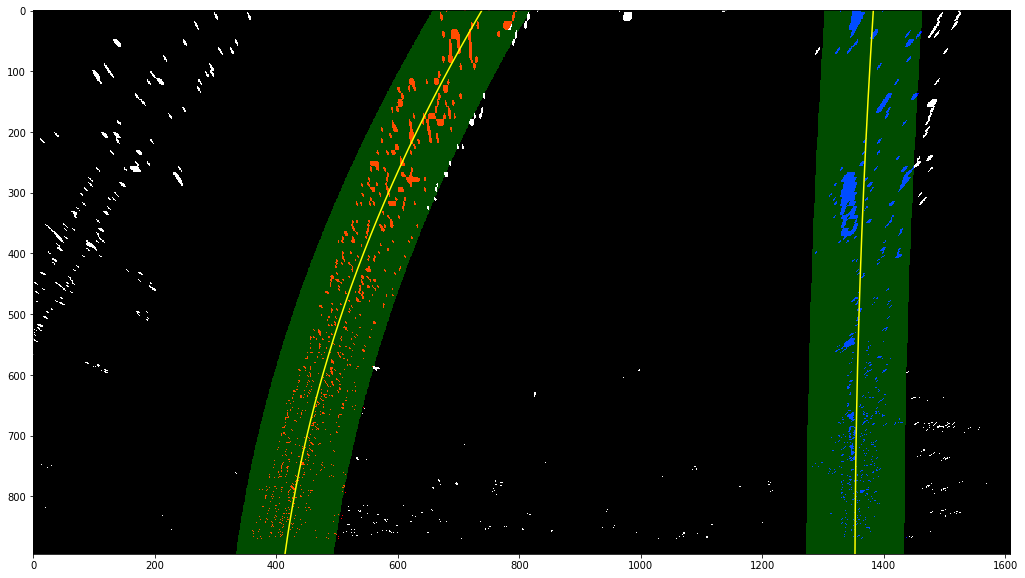

In [69]:
# generate a binary warped image
gradx      = abs_sobel_thresh(undistorted_example_image, orient='x', sobel_kernel=3, thresh=(9, 10))
l_channel  = l_color_grad(undistorted_example_image) 
b_channel  = b_color_grad(undistorted_example_image)
combined   = np.zeros_like(gradx)
combined[((l_channel == 1) ) |  ((b_channel==1) | (gradx==1))] =1
warped = perspective_transform(combined,0)

#generate the needed values for plotting
left_fit, right_fit, left_lane_inds, right_lane_inds,result,leftx,lefty,rightx,righty = margin_finding_lane(left_fit,right_fit,warped)

# Generate x and y values for plotting
ploty = np.linspace(0, warped.shape[0]-1, warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]


f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.imshow(result)
ax1.plot(left_fitx, ploty, color='yellow')
ax1.plot(right_fitx, ploty, color='yellow')


In [70]:
def compute_curvature(y_point, left_fit, right_fit):
    left_curverad = ((1 + (2*left_fit[0]*y_point + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_point + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    return left_curverad, right_curverad

In [71]:
def realWorldValues(left_fit,right_fit,leftx, rightx, lefty,righty, y_point,image_width):
    # Define conversions in x and y from pixels space to meters
    lane_x_left     = left_fit[0]*y_point**2 + left_fit[1]*y_point + left_fit[2]
    lane_x_right    = right_fit[0]*y_point**2 + right_fit[1]*y_point + right_fit[2]
    ym_per_pix = 30/720 # meters per pixel in y dimension
    #xm_per_pix = 3.7/700 # meters per pixel in x dimension
    xm_per_pix = 3.7/(lane_x_right - lane_x_left)
    
    # Fit new polynomials to x,y in world space
    left_fit_cr  = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad  = ((1 + (2*left_fit_cr[0]*y_point*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_point*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    
    if left_fit_cr is not None and right_fit_cr is not None:
        car             = image_width/2
        lane_center     = (lane_x_left + lane_x_right) /2
        center_distance = (car - lane_center) * xm_per_pix
    
    return left_curverad, right_curverad, center_distance

## Curvature and distance from lane center

In [72]:
left_curverad, right_curverad, center_distance = realWorldValues(left_fit,right_fit,leftx,
                                                                 rightx,lefty,righty, warped.shape[0],warped.shape[1])

print('curvature left: ',left_curverad, 'm,  curvature right', right_curverad, 'm')
print('Distance from lane center:', center_distance, 'm')


curvature left:  872.380997966 m,  curvature right 6511.44491175 m
Distance from lane center: -0.311494968547 m


In [73]:
#draw lane
def draw_lane(img,bird_eye,left_fit,right_fit):
    tmp_image     = np.copy(img)
    if right_fit is None or left_fit is None:
        return img
    
    zero          = np.zeros_like(bird_eye).astype(np.uint8)
    layered_image = np.dstack((zero,zero,zero))
    
    ploty      = np.linspace(0, bird_eye.shape[0]-1, bird_eye.shape[0] )
    left_fitx  = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2] 
    
    #formatting the points
    left   = np.array([np.transpose(np.vstack([right_fitx,ploty]))])
    right  = np.array([np.flipud(np.transpose(np.vstack([left_fitx,ploty])))])
    points = np.hstack((left,right))
    
    #form lane
    cv2.fillPoly(layered_image,np.int_([points]),(0,255,0))
    cv2.polylines(layered_image,np.int32([right]),isClosed = False,color=(255,0,0),thickness = 20)
    cv2.polylines(layered_image,np.int32([left]),isClosed = False,color=(255,0,0),thickness = 20)
    
    inversed = perspective_transform(layered_image,1)
    output   = cv2.addWeighted(tmp_image,1,inversed,0.5,0)
    return output
    

## Drawing lanes area

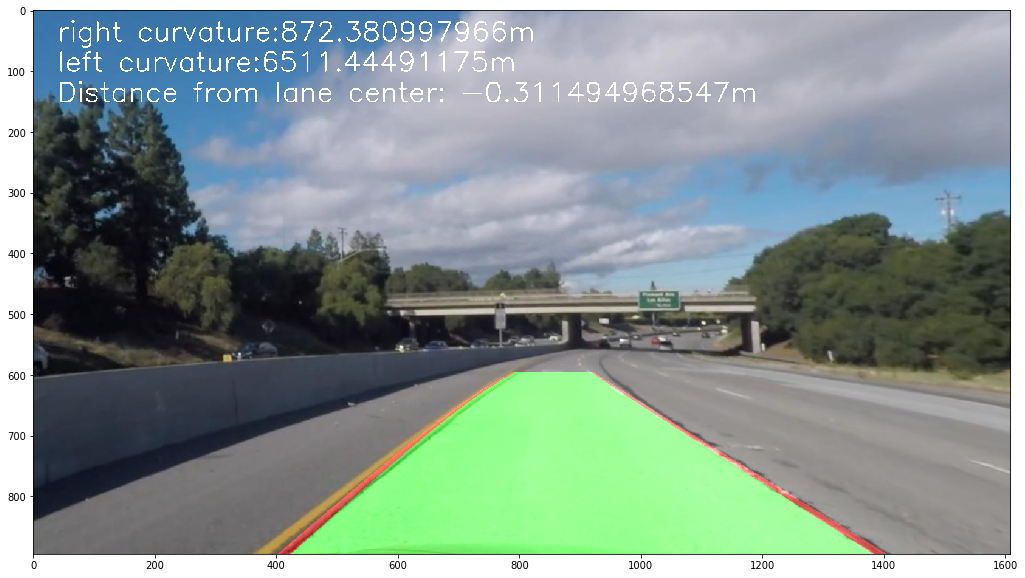

In [74]:
output = draw_lane(undistorted_example_image,warped,left_fit,right_fit)
f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
cv2.putText(output, 'right curvature:' + str(left_curverad) + 'm', (40, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 2)
cv2.putText(output, 'left curvature:' + str(right_curverad) + 'm', (40, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 2)
cv2.putText(output, 'Distance from lane center: ' + str(center_distance) + 'm', (40, 150), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 2)

ax1.imshow(output)

In [83]:
import imageio
from moviepy.editor import VideoFileClip
from IPython.display import HTML


def pipeline1(img):
    
    ksize = 3# Choose a larger odd number to smooth gradient measurements
    
    undistorted = cv2.undistort(img, mtx, dist, None, mtx)   
     # Apply each of the thresholding functions
    gradx      = abs_sobel_thresh(undistorted, orient='x', sobel_kernel=ksize, thresh=(9, 10))
    grady      = abs_sobel_thresh(undistorted, orient='y', sobel_kernel=ksize, thresh=(90, 255))
    mag_binary = mag_thresh(undistorted, sobel_kernel=ksize, mag_thresh=(150, 255))
    dir_binary = dir_threshold(undistorted, sobel_kernel=ksize, thresh=(0.9, 1.2))
    l_channel  = l_color_grad(undistorted) 
    b_channel  = b_color_grad(undistorted)
    #combined   = np.zeros_like(gradx)
    combined = comb_thresh(undistorted)
    #combined[((l_channel == 1) ) |  ((b_channel==1) | (gradx==1))] = 1
    wraped = perspective_transform(combined,0)
    
    if not left_line.detected and not right_line.detected:
        left_fit,right_fit,left_lane_inds,right_lane_inds,out_img,histogram,leftx,lefty,rightx,righty = histo_finding_lane(wraped)
    else:
        left_fit,right_fit,left_lane_inds,right_lane_inds,result,leftx,lefty,rightx,righty = margin_finding_lane(left_line.best_fit, right_line.best_fit, wraped)   
        
    left_line.add_fit(left_fit, left_lane_inds)
    right_line.add_fit(right_fit, right_lane_inds)
    
    if left_line.best_fit is not None and right_line.best_fit is not None:
        left_curverad, right_curverad = compute_curvature(img.shape[0], left_line.best_fit, right_line.best_fit)
        final = draw_lane(undistorted,wraped,left_line.best_fit,right_line.best_fit)
        left_curve_rate, right_curve_rate, center_dev = realWorldValues(left_fit,right_fit,leftx, rightx, lefty,righty, wraped.shape[0],wraped.shape[1])
    else:
        left_curverad, right_curverad = compute_curvature(img.shape[0], left_fit, right_fit)
        final = draw_lane(undistorted,wraped,left_fit,right_fit)
        realWorldValues(left_fit,right_fit,leftx, rightx, lefty,righty, wraped.shape[0],wraped.shape[1])
    
    cv2.putText(final, 'right curvature:' + str(left_curverad) + 'm', (40, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 2)
    cv2.putText(final, 'left curvature:' + str(right_curverad) + 'm', (40, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 2)
    cv2.putText(final, 'Distance from lane center: ' + str(center_dev) + 'm', (40, 150), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 2)

    return final


left_line = Line()
right_line = Line()

clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(pipeline1)
white_output = "project_video_output.mp4"
%time white_clip.write_videofile(white_output,audio = False)


HTML("""<video width ="960" height ="540" controls> 
<source src ="{0}"> 
</video>""".format(white_output))

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 1260/1261 [04:36<00:00,  4.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 5min 5s, sys: 51.4 s, total: 5min 56s
Wall time: 4min 37s
